# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, votre prénom et votre numéro étudiant:
</div>


In [ ]:
# HARRAOUI Ines 21204796

# TME solo noté 

<div class="alert alert-block alert-info">
Tout d'abord, exécuter la boite ci-dessous pour importer les bibliothèques nécessaires.
</div>

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Regression linéaire multiple (10 pts)

<div class="alert alert-block alert-warning">
Dans cette partie, nous allons faire une régression linéaire multiple sur des données simulées.
Nous allons donc chercher les coefficients $b_0$, $b_1$, $b_2$ et $b_3$ tels que $\mathbf{\tilde{y}} = b_0 + b_1 \mathbf{x_1} + b_2 \mathbf{x_2} + b_3 \mathbf{x_3}$ où $\mathbf{\tilde{y}}\approx \mathbf{y}$ au sens des moindres carrés.
<div>

<div class="alert alert-block alert-warning">
Pour commencer, nous allons simuler les variables explicatives du modèle, autrement dit les variables $x_1$, $x_2$, et $x_3$.
<div>

<div class="alert alert-block alert-info">
Q1.1 - En utilisant la fonction <code>np.random.uniform(low=a, high=b, size=n)</code> simuler des échantillons de taille $n=500$ tels que $x_1 \sim \mathcal{U}[-100, 100]$,
    $x_2 \sim \mathcal{U}[0, 1]$ et 
    $x_3 \sim \mathcal{U}[-4, 9]$. 
</div>

In [3]:
x1=np.random.uniform(low=-100, high=100, size=500) 
x2=np.random.uniform(low=0, high=1, size=500)
x3=np.random.uniform(low=-4, high=9, size=500)

<div class="alert alert-block alert-info">
Q1.2 - La fonction <code>np.random.normal(size=n)</code> permet de générer un échantillon d'une loi normale centrée réduite $\mathcal{N}(0, 1)$ de taille n. Utilisez cette fonction pour générer un échantillon <code>eps</code> de même taille que précedemment.
</div>

In [4]:
eps=np.random.normal(size=500)

<div class="alert alert-block alert-info">
Q1.3 - Faire un histogramme des valeurs obtenues en choisissant correctement le nombre de segments (bins). L'histogramme doit pouvoir rendre compte de la loi de l'échantillon, ici $\mathcal{N}(0, 1)$.
</div>   

(array([  5.,   7.,  36.,  56., 119., 103.,  94.,  58.,  18.,   4.]),
 array([-3.08348809, -2.50095117, -1.91841425, -1.33587733, -0.75334042,
        -0.1708035 ,  0.41173342,  0.99427034,  1.57680726,  2.15934418,
         2.7418811 ]),
 <BarContainer object of 10 artists>)

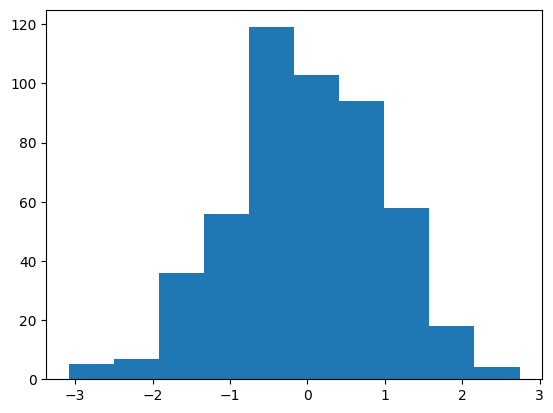

In [5]:
plt.hist(np.random.normal(size=500))

<div class="alert alert-block alert-info">
Q1.4 - Nous pouvons maintenant écrire la variable à expliquer en fonction des autres variables.
Écrire la variable $\mathbf{Y}$ tel que
$\mathbf{Y} = b_0\mathbf{1} + b_1 \mathbf{x_1} + b_2 \mathbf{x_2} + b_3 \mathbf{x_3} + eps$,
avec $b_0 = - 2.33$, $b_1 = - 0.06$, $b_2 = 3.76$, $b_3 = 0.66$, et $\mathbf{1} = [1, \dots ,1]$
un vecteur composé que de 1.
</div>   

In [6]:
Y=-2.33*np.ones(500)-0.66*x1+3.76*x2+0.66*x3

<div class="alert alert-block alert-info">
Q1.5 - Créer une matrice $\mathbf{X}$ dont les colonnes seront composées d'un vecteur ne contenant que des 1 et de $x_1$, $x_2$, et $x_3$. Autrement dit, nous voulons une matrice $\mathbf{X}$ telle que 
    $$
    \mathbf{X} = [\mathbf{1} \; \mathbf{x_1} \;               \mathbf{x_2} \; \mathbf{x_3}]
    $$
</div>   

In [7]:
X= np.array([np.ones(len(x1)),x1,x2,x3])
X

array([[  1.        ,   1.        ,   1.        , ...,   1.        ,
          1.        ,   1.        ],
       [-81.96917227, -11.39635997,  66.98915642, ...,   6.45205286,
        -51.12687855, -58.39857389],
       [  0.50285125,   0.36678101,   0.3656602 , ...,   0.30636859,
          0.19794169,   0.53441931],
       [  3.02411691,   4.7080078 ,   5.06854504, ...,   7.50080501,
          8.07416181,  -2.85034118]])

<div class="alert alert-block alert-info">
Q1.6 - Écrire une fonction qui prend en paramètre une matrice $\mathbf{A}$ et un vecteur $\mathbf{v}$, et qui renvoie le vecteur $\mathbf{b}$ qui minimise :
  $$
  \|\mathbf{A} \mathbf{b} - \mathbf{v} \|^2.
  $$
  c'est-à-dire la solution de l'équation matricielle :
  $$
    \left(\mathbf{A}^T\mathbf{A}\right) \mathbf{b} = \left(\mathbf{A}^T\mathbf{v}\right)
  $$
  
  On utilisera la fonction <code>np.linalg.solve</code>.
</div>

In [110]:
def f(A,v):
    t=np.dot(np.transpose(A) @ v)
    tt=np.dot(np.transpose(A)@ A)
    s= np.linalg.solve(tt,t)
    return s
    
    

<div class="alert alert-block alert-info">
Q1.7 - Appliquez la fonction pour calculer les coefficients de régression de la variable $\mathbf{Y}$ en fonction de $\mathbf{X}$. Commentez votre résultat : retrouvez-vous exactement les vrais coefficients de régression donnés à la question 1.4? À quoi cela est-il dû ?  
</div>

In [111]:
f(X,Y)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 500 is different from 4)

<div class="alert alert-block alert-info">
Q1.8 - Écrire une fonction qui prend en paramètre une matrice $\mathbf{A}$ et un vecteur $\mathbf{v}$ et qui génère le nuage de point $(\tilde{v}_i, v_i)$, où $\tilde{v}_i$ correspond à l'estimation de $v_i$ au sens des moindres carrés.
</div>  

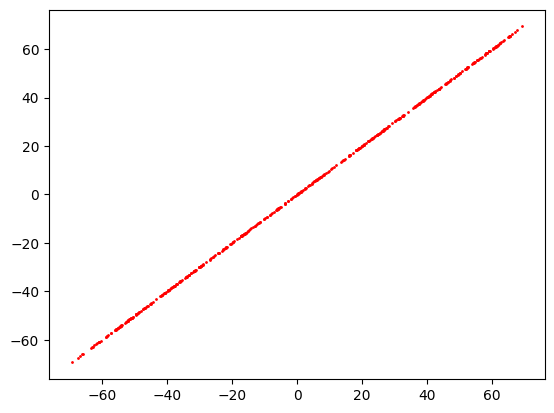

In [83]:
def nuage(A,v):
    n= plt.scatter([np.mean(i) for i in v],v,s=1,color = 'red')
    return n
nuage(X,Y)

<div class="alert alert-block alert-info">
    Q1.9 - Écrire une fonction qui prend en paramètre une matrice $\mathbf{A}$ et un vecteur $\mathbf{v}$ qui retourne le $R^2$ de la régression multiple de $\mathbf{v}$ en fonction de $\mathbf{X}$. Pour rappel $R^2$ = $cor(\mathbf{\tilde{v}}, \mathbf{v})^2$ et $cor(\mathbf{\tilde{v}}, \mathbf{v}) = \frac{cov(\mathbf{\tilde{v}}, \mathbf{v})}{\sqrt{var(\mathbf{\tilde{v}})}\sqrt{var(\mathbf{v})}}$.
</div>   

In [77]:
def cov(A,v):
    a= np.sum((A-np.mean(A))*(v-np.mean(v)))
    n = len(A)       
    return (1/n)*a


In [78]:
def cor(A,v):
    return cov(A,v)/(sqrt(np.var(A)*np.var(v)))

In [79]:

def reg2(A,v):
    m = cov(X,v)/np.var(X)
    p = np.mean(v)-(m*np.mean(v))
    return (m,p)
    

<div class="alert alert-block alert-info">
Q1.10 - Appliquez la fonction pour calculer le $R^2$ de la régression de $\mathbf{Y}$ en fonction de $\mathbf{X}$. Le résultat est-il cohérent avec le reste de l'étude ? 
    </div> 

In [80]:
reg2(X,Y)

(-326.48028739275276, 343.274481201573)

## Jeu de données (5 pts)

<div class="alert alert-block alert-info">
    Q2.1 - Charger les données du fichier <code>poi-paris.csv</code> dans une variable <code>tableau_poi</code> à l'aide de la fonction <code>pd.read_csv('nom_de_fichier.csv')</code>.
</div>

In [14]:
tableau_poi=pd.read_csv('poi-paris.csv')
tableau_poi

,nom,latitude,longitude,note,prix,furniture_store,laundry,bakery,cafe,home_goods_store,clothing_store,atm,lodging,night_club,convenience_store,restaurant,bar
0,Unopiu,48.866632,2.331637,2.2,-1,1,0,0,0,1,0,0,0,0,0,0,0
1,Olivier Hutzemakers,48.903289,2.339881,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
2,Téodor,48.847633,2.375378,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
3,Féau and Co.,48.879841,2.297154,5.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
4,Patoux Florence Marie-therese,48.827933,2.309074,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31847,Le Rallye Bar,48.858395,2.425150,-1.0,-1,0,0,0,0,0,0,0,0,0,0,0,1
31848,lotus de chine,48.914816,2.382295,-1.0,-1,0,0,0,0,0,0,0,0,0,0,0,1
31849,King George,48.874817,2.341561,4.1,-1,0,0,0,0,0,0,0,0,0,0,1,1
31850,Le Révérend,48.914967,2.286391,4.5,-1,0,0,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-block alert-info">
Q2.2 - Affichez les premières lignes du tableau, ET un résumé statistique de toutes les variables en utilisant la méthode <code>describe</code>.
</div>

In [54]:
tableau_poi.head(5)

,nom,latitude,longitude,note,prix,furniture_store,laundry,bakery,cafe,home_goods_store,clothing_store,atm,lodging,night_club,convenience_store,restaurant,bar
0,Unopiu,48.866632,2.331637,2.2,-1,1,0,0,0,1,0,0,0,0,0,0,0
1,Olivier Hutzemakers,48.903289,2.339881,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
2,Téodor,48.847633,2.375378,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
3,Féau and Co.,48.879841,2.297154,5.0,-1,1,0,0,0,1,0,0,0,0,0,0,0
4,Patoux Florence Marie-therese,48.827933,2.309074,-1.0,-1,1,0,0,0,1,0,0,0,0,0,0,0


In [17]:
tableau_poi.describe

<bound method NDFrame.describe of                                  nom   latitude  longitude  note  prix  \
0                             Unopiu  48.866632   2.331637   2.2    -1   
1                Olivier Hutzemakers  48.903289   2.339881  -1.0    -1   
2                             Téodor  48.847633   2.375378  -1.0    -1   
3                       Féau and Co.  48.879841   2.297154   5.0    -1   
4      Patoux Florence Marie-therese  48.827933   2.309074  -1.0    -1   
...                              ...        ...        ...   ...   ...   
31847                  Le Rallye Bar  48.858395   2.425150  -1.0    -1   
31848                 lotus de chine  48.914816   2.382295  -1.0    -1   
31849                    King George  48.874817   2.341561   4.1    -1   
31850                    Le Révérend  48.914967   2.286391   4.5    -1   
31851                   Avern' Store  48.900784   2.315682  -1.0    -1   

       furniture_store  laundry  bakery  cafe  home_goods_store  \
0         

<div class="alert alert-block alert-info">
Q2.3.a - Définir une variable <code>bars</code> ne contenant que les lieux qui sont des bars, ne sont pas des restaurants et ont une note au-dessus de 2.
</div>

In [59]:
bars = tableau_poi[(tableau_poi['bar'] == 1) & (tableau_poi['restaurant'] == 0) & (tableau_poi['note'] > 2)]


<div class="alert alert-block alert-info">
Q2.3.b - Définir une variable <code>restos</code> ne contenant que les lieux qui sont des restaurants, ne sont pas des bars et ont soit une note de 1 soit une note de 3.
</div>

In [64]:
restos = tableau_poi[(tableau_poi['restaurant'] == 1) & (tableau_poi['bar'] == 0) & (tableau_poi['note'] ==(1  or 3))] 
restos

,nom,latitude,longitude,note,prix,furniture_store,laundry,bakery,cafe,home_goods_store,clothing_store,atm,lodging,night_club,convenience_store,restaurant,bar
5148,Cafés Richard,48.841746,2.366539,1.0,-1,0,0,1,1,0,0,0,0,0,0,1,0
5727,Paul,48.839415,2.318075,1.0,-1,0,0,1,1,0,0,0,0,0,0,1,0
6177,Pomme De Pain,48.825814,2.393252,1.0,-1,0,0,1,0,0,0,0,0,0,0,1,0
7150,Maison Pradier,48.880361,2.354639,1.0,-1,0,0,0,1,0,0,0,0,0,0,1,0
7818,Segafredo,48.876304,2.323937,1.0,-1,0,0,0,1,0,0,0,0,0,0,1,0
8183,Café Carlito,48.886572,2.317461,1.0,-1,0,0,0,1,0,0,0,0,0,0,1,0
21817,Akli Tahar,48.807165,2.413042,1.0,-1,0,0,0,0,0,0,0,1,0,0,1,0
23309,Tamarin 2,48.822463,2.420107,1.0,-1,0,0,0,0,0,0,0,0,0,0,1,0
24130,Mkc,48.822907,2.307610,1.0,-1,0,0,0,0,0,0,0,0,0,0,1,0
24570,Hotel de la Paix,48.865379,2.371933,1.0,-1,0,0,0,0,0,0,0,1,0,0,1,0


<div class="alert alert-block alert-info">
Q2.3.c - Définir une variable <code>barestos</code> ne contenant que les lieux qui sont à la fois des restaurants et des bars et ont une note attribuée.
</div>

In [39]:
barestos = tableau_poi[(tableau_poi['bar'] == 1) & (tableau_poi['restaurant'] == 1) & (tableau_poi['note'] >= 0)]
barestos

,nom,latitude,longitude,note,prix,furniture_store,laundry,bakery,cafe,home_goods_store,clothing_store,atm,lodging,night_club,convenience_store,restaurant,bar
938,ALLO CHR,48.876602,2.422864,3.8,-1,1,0,1,0,1,0,0,0,0,0,1,1
2018,La Chaise Et Le Vin,48.854505,2.364844,4.7,-1,1,0,0,0,1,0,0,0,0,0,1,1
4334,Café Pouchkine,48.869887,2.325498,3.7,-1,0,0,1,1,0,0,0,0,0,0,1,1
4677,CENTRAL PARC,48.812354,2.472908,4.1,-1,0,0,1,0,0,0,0,0,0,0,1,1
5038,Cuisine et Dépendances,48.869419,2.350863,4.5,-1,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31835,Sashimi,48.845953,2.343329,3.8,-1,0,0,0,0,0,0,0,0,0,0,1,1
31836,Le Saut du Crapaud,48.831568,2.324250,4.2,-1,0,0,0,0,0,0,0,0,0,0,1,1
31839,Ah! la Pompe à Biere,48.889289,2.376740,4.5,-1,0,0,0,0,0,0,0,0,0,0,1,1
31841,Au Métro,48.864419,2.368516,3.6,-1,0,0,0,0,0,0,0,0,0,0,1,1


## Loi discrète (5 pts)

<div class="alert alert-block alert-info">
Q3.1 - Définir la fonction <code>ber_tirages</code> qui prend en paramètres une probabilité de succès <code>pi</code> et un nombre d'exprériences <code>nexp</code> et qui renvoie le résultat de <code>nexp</code> tirages indépendants selon la loi de Bernoulli $\mathcal{B}(\pi)$.
    
<code>np.random.rand(n)</code> renvoie un vecteur de valeurs pseudo-aléatoires de taille $n$.
</div>

In [93]:
def ber_tirages(pi,nexp):
    b=(pi^np.random.rand(nexp))*(1-pi)^np.random.rand(nexp)
    return b

<div class="alert alert-block alert-info">
Q3.2 - Écrire une fonction <code>freq_succes</code> qui, étant donné une probabilité <code>pi</code> et un nombre d'expériences <code>nexp</code>, renvoie renvoie la moyenne empririque de succès de <code>nexp</code> tirages aléatoires indépendants selon $\mathcal{B}(\pi)$
</div>

In [94]:
def freq_succes(pi,nexp):
    fr=np.mean(ber_tirages(pi,nexp))
    return fr

<div class="alert alert-block alert-info">
Q3.3 - Écrire une fonction <code>dessin_freq</code> qui, étant donné une probabilité <code>pi</code> et un nombre maximal d'expériences <code>nmax</code>, affiche le graphique du nuage de points de la fréquence en fonction du nombre d'expériences en 1 et <code>nmax</code> ainsi que la droite d'équation $y = \pi$.
</div>

In [95]:
def dessin_freq(pi,nmax):
    sc=plt.scatter(1,freq_succes(pi,nmax),s=1)
    dr=plt.plot(pi,y)
    return sc, dr

<div class="alert alert-block alert-info">
Appliquer la fonction précédente pour voir le graphique avec <code>pi = 0.8</code> et <code>nmax = 1000</code>.
</div>

In [96]:
dessin_freq(0.8,1000)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''